<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding How The Data Is Distributed**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis (EDA). You will examine the structure of the data, visualize key variables, and analyze trends related to developer experience, tools, job satisfaction, and other important aspects.


## Objectives


In this lab you will perform the following:


- Understand the structure of the dataset.

- Perform summary statistics and data visualization.

- Identify trends in developer experience, tools, job satisfaction, and other key variables.


### Install the required libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn


### Step 1: Import Libraries and Load Data


- Import the `pandas`, `matplotlib.pyplot`, and `seaborn` libraries.


- You will begin with loading the dataset. You can use the pyfetch method if working on JupyterLite. Otherwise, you can use pandas' read_csv() function directly on their local machines or cloud environments.


In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Display the first few rows of the dataset
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Step 2: Examine the Structure of the Data


- Display the column names, data types, and summary information to understand the data structure.

- Objective: Gain insights into the dataset's shape and available variables.


In [5]:
## Write your code here
df.info

<bound method DataFrame.info of        ResponseId                      MainBranch                 Age  \
0               1  I am a developer by profession  Under 18 years old   
1               2  I am a developer by profession     35-44 years old   
2               3  I am a developer by profession     45-54 years old   
3               4           I am learning to code     18-24 years old   
4               5  I am a developer by profession     18-24 years old   
...           ...                             ...                 ...   
65432       65433  I am a developer by profession     18-24 years old   
65433       65434  I am a developer by profession     25-34 years old   
65434       65435  I am a developer by profession     25-34 years old   
65435       65436  I am a developer by profession     18-24 years old   
65436       65437     I code primarily as a hobby     18-24 years old   

                Employment                            RemoteWork   Check  \
0      Employed

### Step 3: Handle Missing Data


- Identify missing values in the dataset.

- Impute or remove missing values as necessary to ensure data completeness.



In [3]:
## Write your code here

#Step 1: Missing values summary
missing_counts = df.isnull().sum().sort_values(ascending=False)
missing_percent = (missing_counts / len(df)) * 100

missing_summary = pd.DataFrame({
    "MissingCount": missing_counts,
    "MissingPercent": missing_percent
})

print("Top 15 columns with missing values:")
print(missing_summary.head(15))

# Step 2: Drop columns with more than 70% of data missing
sparse_columns = missing_summary[missing_summary["MissingPercent"] > 70].index.tolist()
df_cleaned = df.drop(columns=sparse_columns)

print(f"\nDropped {len(sparse_columns)} sparse columns (>70% missing).")

#Step 3: Impute missing values
# Numeric columns → fill with median
for col in df_cleaned.select_dtypes(include=['float64', 'int64']).columns:
    if df_cleaned[col].isnull().sum() > 0:
        df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].median())

# Categorical columns = fill with mode
for col in df_cleaned.select_dtypes(include=['object']).columns:
    if df_cleaned[col].isnull().sum() > 0:
        df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].mode()[0])

#Step 4: Verify completeness
missing_after = df_cleaned.isnull().sum().sum()
print(f"\nRemaining missing values: {missing_after}")

# Final shape
print(f"Final dataset shape: {df_cleaned.shape}")

Top 15 columns with missing values:
                               MissingCount  MissingPercent
AINextMuch less integrated            64289       98.245641
AINextLess integrated                 63082       96.401119
AINextNo change                       52939       80.900714
AINextMuch more integrated            51999       79.464217
EmbeddedAdmired                       48704       74.428840
EmbeddedWantToWorkWith                47837       73.103901
EmbeddedHaveWorkedWith                43223       66.052845
ConvertedCompYearly                   42002       64.186928
AIToolNot interested in Using         41023       62.690832
AINextMore integrated                 41009       62.669438
Knowledge_9                           37802       57.768541
Frequency_3                           37727       57.653927
Knowledge_8                           37679       57.580574
ProfessionalTech                      37673       57.571405
Knowledge_7                           37659       57.550010

Dro

In [4]:
df.shape

(65437, 114)

### Step 4: Analyze Key Columns


- Examine key columns such as `Employment`, `JobSat` (Job Satisfaction), and `YearsCodePro` (Professional Coding Experience).

- **Instruction**: Calculate the value counts for each column to understand the distribution of responses.



In [7]:
## Write your code here
# Columns of interest
columns_of_interest = ["Employment", "JobSat", "YearsCodePro"]

# Calculate value counts for each column
for col in columns_of_interest:
    print(f"\n--- {col} ---")
    print(df[col].value_counts(dropna=False))


--- Employment ---
Employment
Employed, full-time                                                                                                                                   39041
Independent contractor, freelancer, or self-employed                                                                                                   4846
Student, full-time                                                                                                                                     4709
Employed, full-time;Independent contractor, freelancer, or self-employed                                                                               3557
Not employed, but looking for work                                                                                                                     2341
                                                                                                                                                      ...  
Not employed, but looking for wor

### Step 5: Visualize Job Satisfaction (Focus on JobSat)


- Create a pie chart or KDE plot to visualize the distribution of `JobSat`.

- Provide an interpretation of the plot, highlighting key trends in job satisfaction.


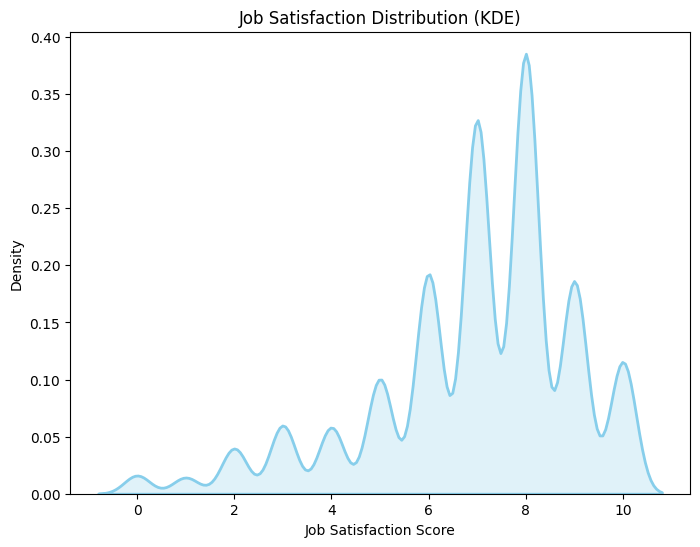

In [8]:
## Write your code here
# Drop missing values
jobsat_scores = df["JobSat"].dropna()

# KDE Plot
plt.figure(figsize=(8, 6))
sns.kdeplot(jobsat_scores, fill=True, color="skyblue", linewidth=2)
plt.title("Job Satisfaction Distribution (KDE)")
plt.xlabel("Job Satisfaction Score")
plt.ylabel("Density")
plt.show()

### Step 6: Programming Languages Analysis


- Compare the frequency of programming languages in `LanguageHaveWorkedWith` and `LanguageWantToWorkWith`.
  
- Visualize the overlap or differences using a Venn diagram or a grouped bar chart.


In [12]:
pip install matplotlib-venn


  Installing build dependencies ... one
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.2/35.2 MB 143.1 MB/s eta 0:00:0000:01
  Created wheel for matplotlib-venn: filename=matplotlib_venn-1.1.2-py3-none-any.whl size=45388 sha256=60d89dc155c0493081910edc29767dd5d9ad956a94c499f64ee7d90c97cc8564
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/c2/47/0c/f014c55a1cfd56dce41a1cafd23e3c590652b5e71330cc181c
Successfully built matplotlib-venn
Note: you may need to restart the kernel to use updated packages.


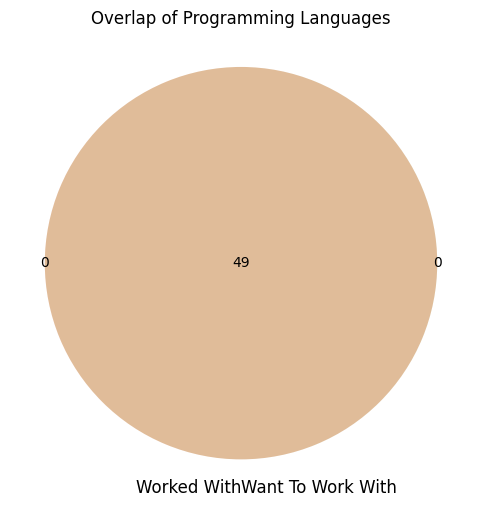

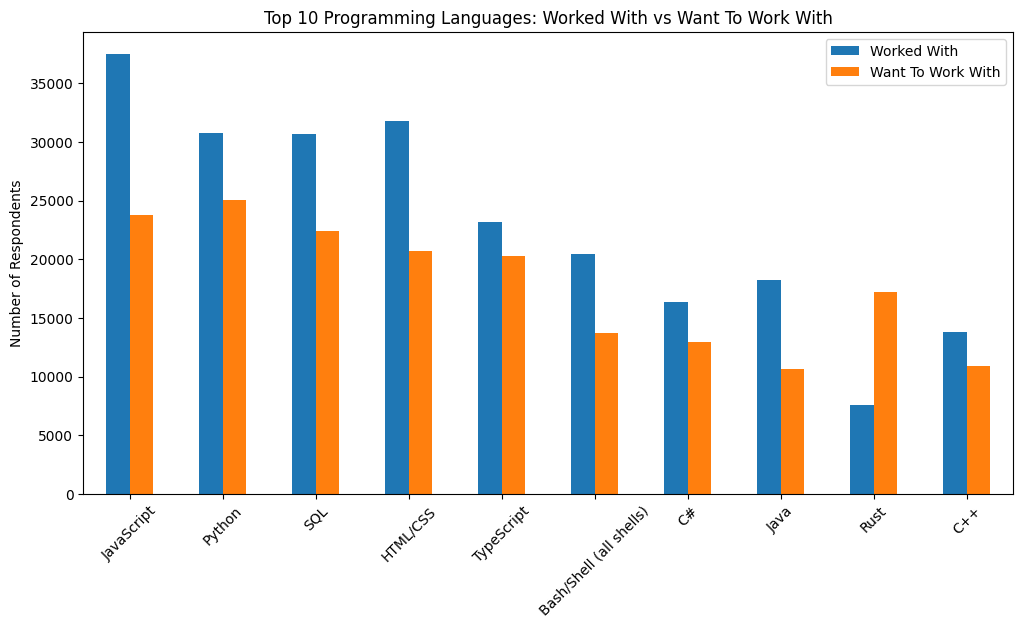

In [13]:
## Write your code here
from matplotlib_venn import venn2

# Extract and clean the columns
have_series = df["LanguageHaveWorkedWith"].dropna().str.split(";")
want_series = df["LanguageWantToWorkWith"].dropna().str.split(";")

# Flatten lists into one big list
have_flat = [lang.strip() for sublist in have_series for lang in sublist]
want_flat = [lang.strip() for sublist in want_series for lang in sublist]

# Count frequencies
have_counts = pd.Series(have_flat).value_counts()
want_counts = pd.Series(want_flat).value_counts()

# --- Venn Diagram (Languages worked with vs want to work with) ---
plt.figure(figsize=(8, 6))
venn2(
    subsets=(set(have_counts.index), set(want_counts.index)),
    set_labels=("Worked With", "Want To Work With")
)
plt.title("Overlap of Programming Languages")
plt.show()

# --- Grouped Bar Chart (Top 10 Languages) ---
top_langs = (have_counts + want_counts).nlargest(10).index  # top 10 overall
compare_df = pd.DataFrame({
    "Worked With": have_counts.reindex(top_langs, fill_value=0),
    "Want To Work With": want_counts.reindex(top_langs, fill_value=0)
})

compare_df.plot(kind="bar", figsize=(12, 6))
plt.title("Top 10 Programming Languages: Worked With vs Want To Work With")
plt.ylabel("Number of Respondents")
plt.xticks(rotation=45)
plt.show()

### Step 7: Analyze Remote Work Trends


- Visualize the distribution of RemoteWork by region using a grouped bar chart or heatmap.


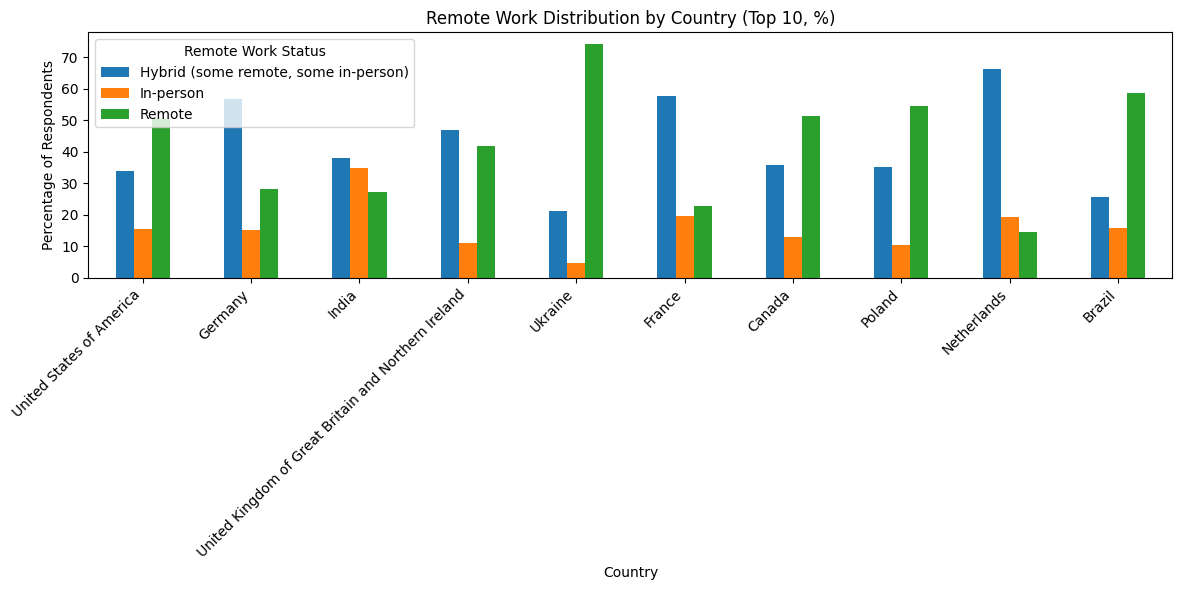

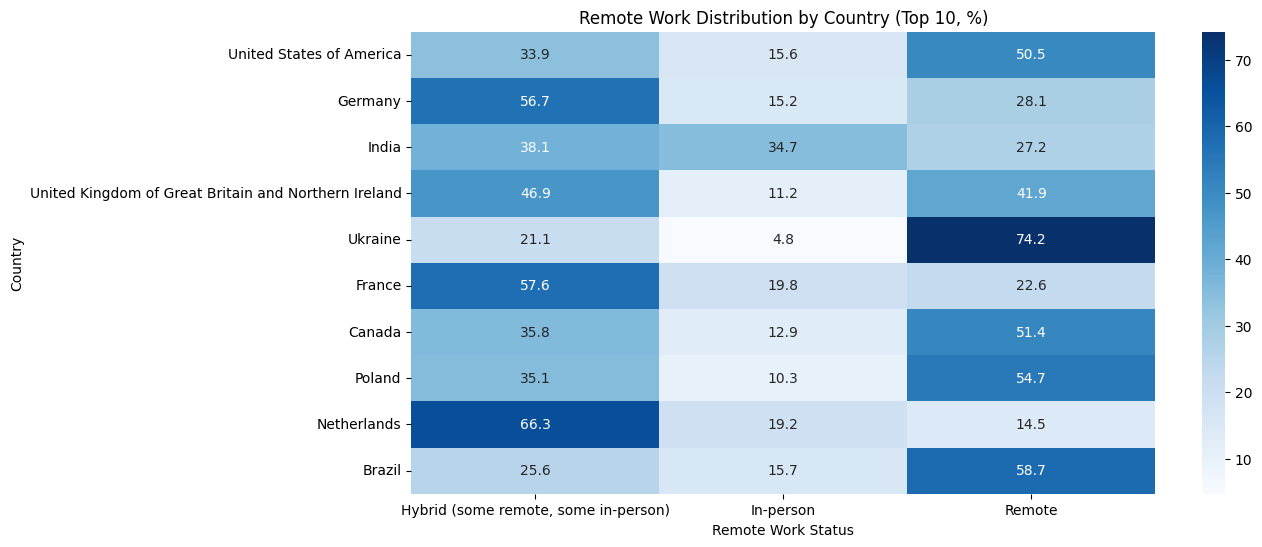

In [16]:
## Write your code here
# Cross-tab (counts)
remote_country_counts = pd.crosstab(df["Country"], df["RemoteWork"])

# Select top 10 countries by total respondents
top_countries = remote_country_counts.sum(axis=1).nlargest(10).index

# Normalize to percentages
remote_country_percent = (
    remote_country_counts.loc[top_countries]
    .div(remote_country_counts.loc[top_countries].sum(axis=1), axis=0) * 100
)

# Plot grouped bar chart
remote_country_percent.plot(kind="bar", figsize=(12, 6))
plt.title("Remote Work Distribution by Country (Top 10, %)")
plt.xlabel("Country")
plt.ylabel("Percentage of Respondents")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Remote Work Status")
plt.tight_layout()
plt.show()

#heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(remote_country_percent, annot=True, fmt=".1f", cmap="Blues")
plt.title("Remote Work Distribution by Country (Top 10, %)")
plt.xlabel("Remote Work Status")
plt.ylabel("Country")
plt.show()

### Step 8: Correlation between Job Satisfaction and Experience


- Analyze the correlation between overall job satisfaction (`JobSat`) and `YearsCodePro`.
  
- Calculate the Pearson or Spearman correlation coefficient.


In [17]:
## Write your code here
# Clean YearsCodePro column
def convert_years(x):
    if pd.isna(x):
        return None
    if "Less than 1 year" in str(x):
        return 0.5
    if "More than 50 years" in str(x):
        return 51
    try:
        return float(x)
    except:
        return None

df["YearsCodePro_clean"] = df["YearsCodePro"].apply(convert_years)

# Keep only numeric data for correlation
data = df[["JobSat", "YearsCodePro_clean"]].dropna()

# Pearson correlation (linear)
pearson_corr = data["JobSat"].corr(data["YearsCodePro_clean"], method="pearson")

# Spearman correlation (rank-based)
spearman_corr = data["JobSat"].corr(data["YearsCodePro_clean"], method="spearman")

print("Pearson correlation:", pearson_corr)
print("Spearman correlation:", spearman_corr)

Pearson correlation: 0.10417890170590677
Spearman correlation: 0.1192006740902708


### Step 9: Cross-tabulation Analysis (Employment vs. Education Level)


- Analyze the relationship between employment status (`Employment`) and education level (`EdLevel`).

- **Instruction**: Create a cross-tabulation using `pd.crosstab()` and visualize it with a stacked bar plot if possible.


In [18]:
## Write your code here
# Cross-tabulation
employment_edlevel = pd.crosstab(df["EdLevel"], df["Employment"])

print(employment_edlevel.head())

Employment                                       Employed, full-time  \
EdLevel                                                                
Associate degree (A.A., A.S., etc.)                             1059   
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                   16806   
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                11011   
Primary/elementary school                                        160   
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                  2073   

Employment                                       Employed, full-time;Employed, part-time  \
EdLevel                                                                                    
Associate degree (A.A., A.S., etc.)                                                    9   
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          90   
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       61   
Primary/elementary school          

/tmp/ipykernel_301/224056648.py:16: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


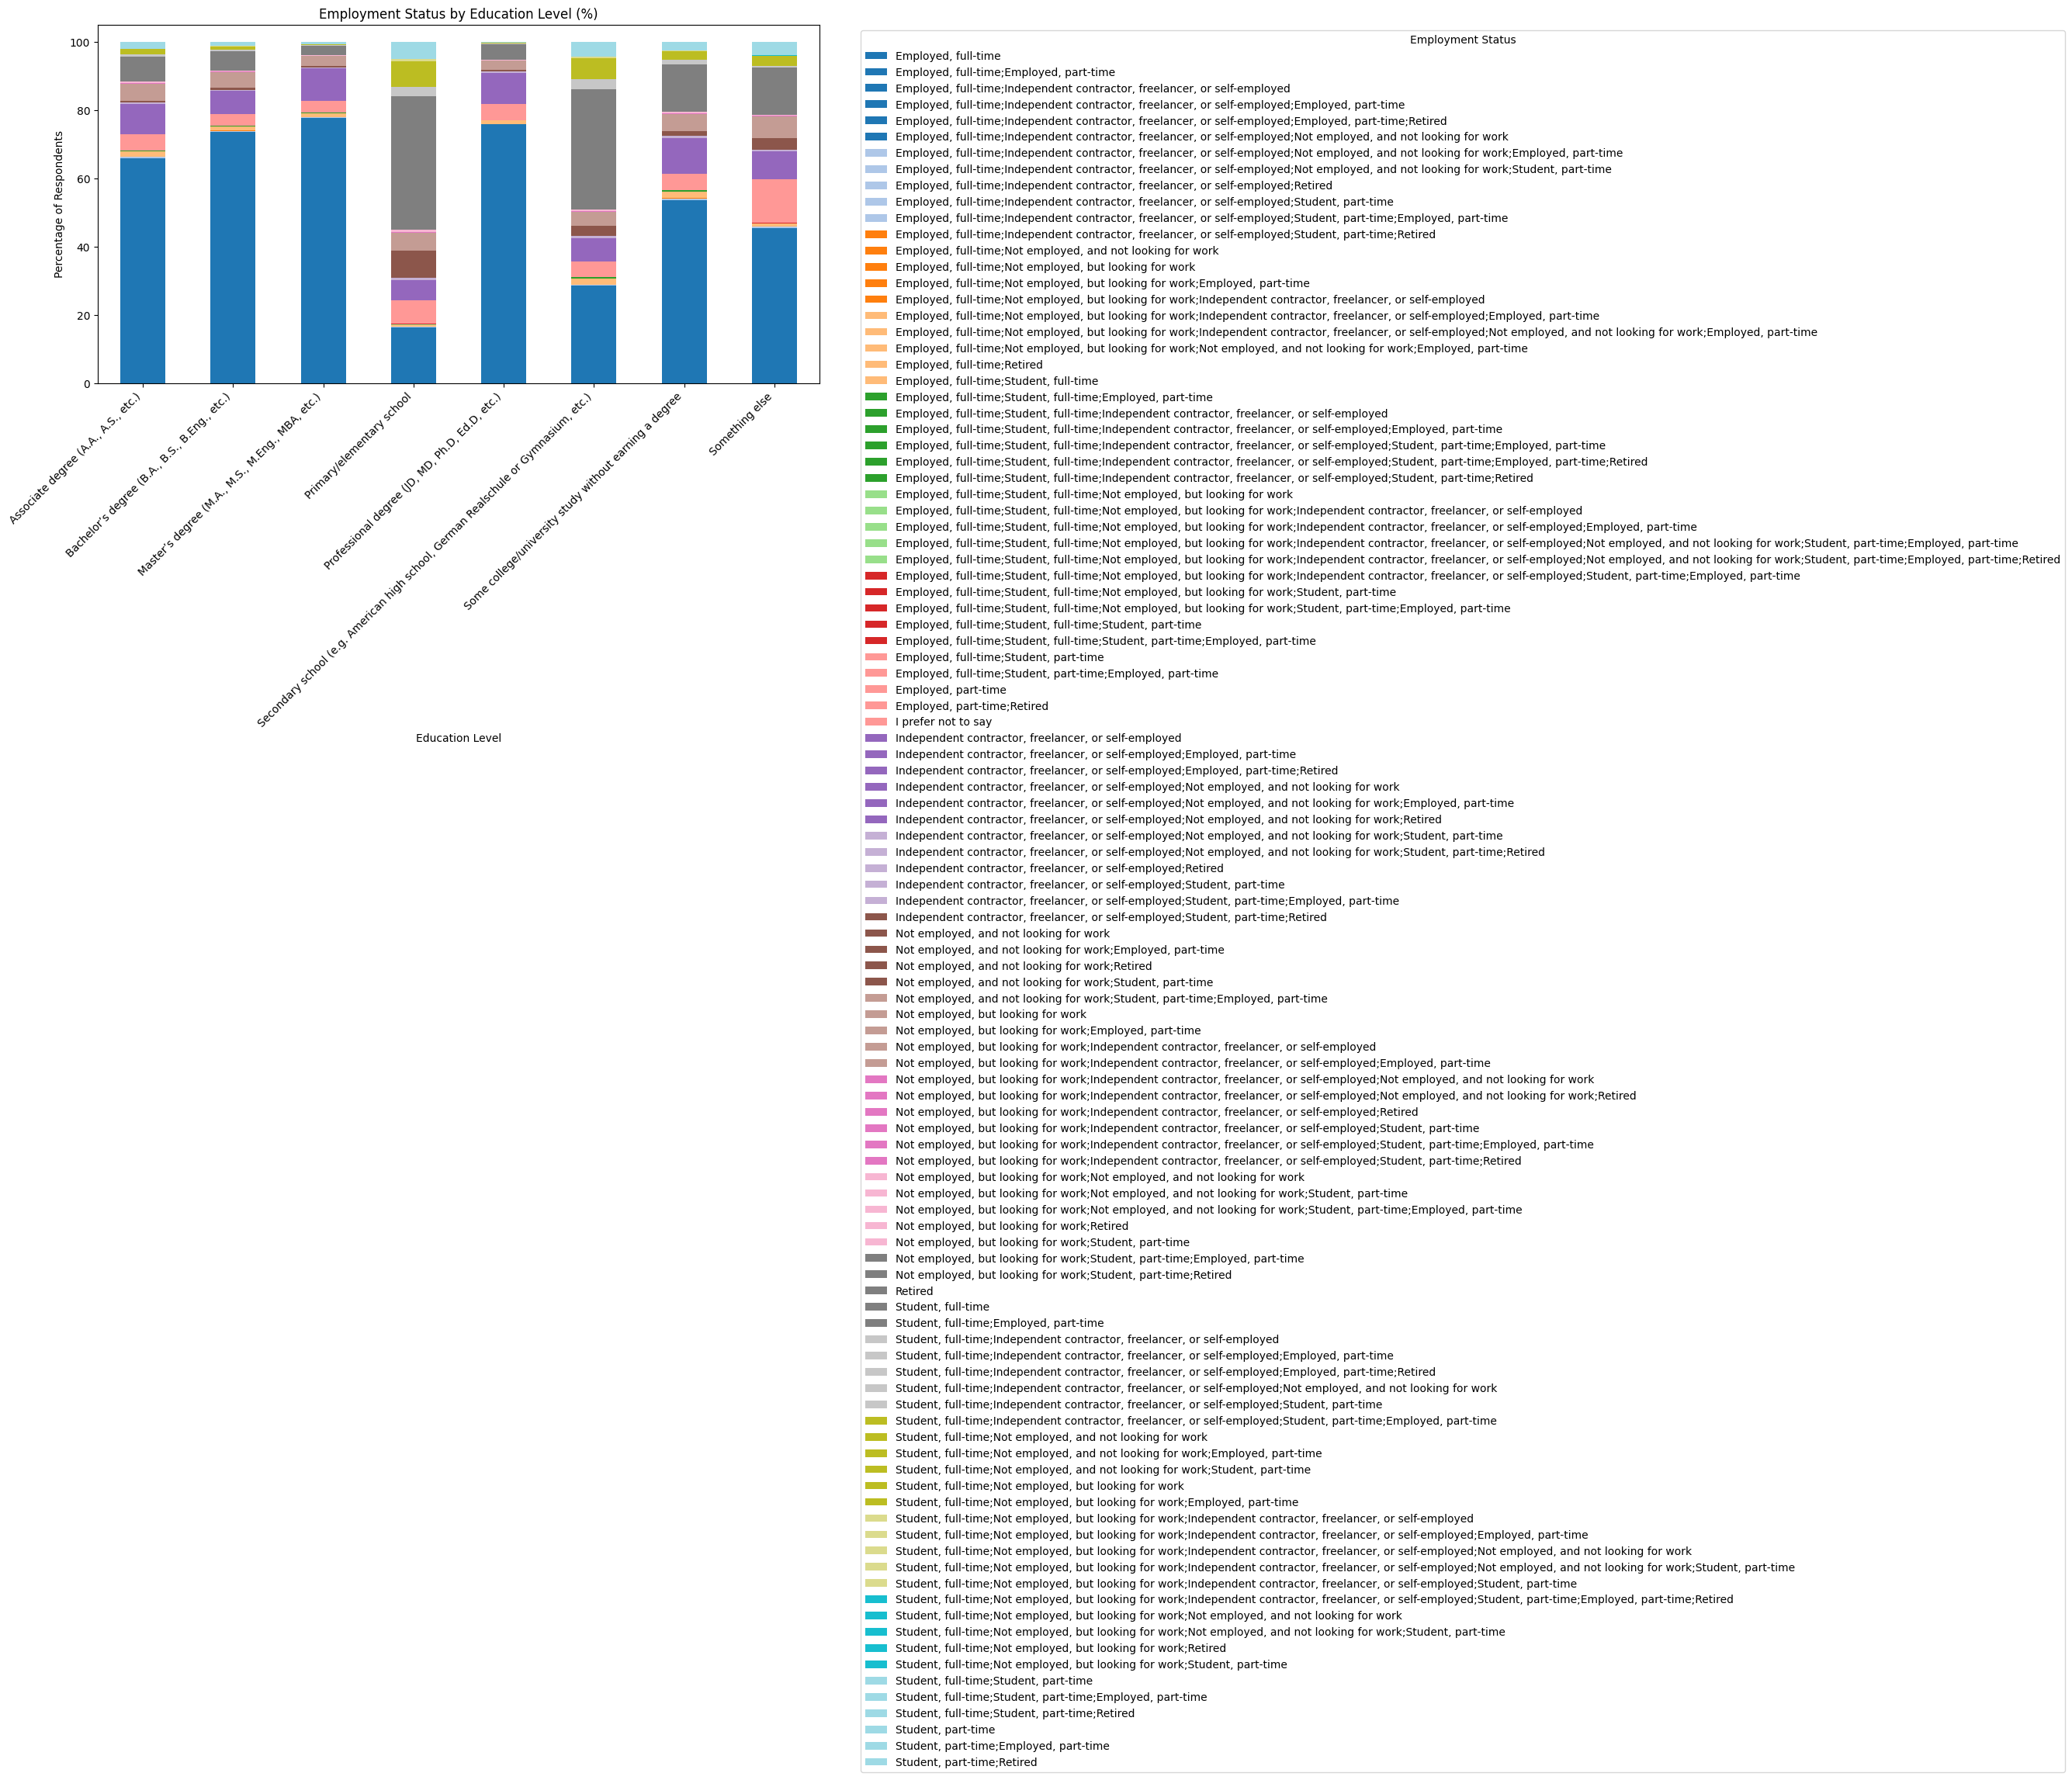

In [19]:
# Normalize by row to get percentages
employment_edlevel_percent = employment_edlevel.div(employment_edlevel.sum(axis=1), axis=0) * 100

# Plot stacked bar chart
employment_edlevel_percent.plot(
    kind="bar", 
    stacked=True, 
    figsize=(12, 6), 
    colormap="tab20"
)
plt.title("Employment Status by Education Level (%)")
plt.xlabel("Education Level")
plt.ylabel("Percentage of Respondents")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Employment Status", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


### Step 10: Export Cleaned Data


- Save the cleaned dataset to a new CSV file for further use or sharing.


In [21]:
## Write your code here
# Save cleaned dataset to new CSV
df.to_csv("survey_data_cleaned1.csv", index=False)

### Summary:


In this lab, you practiced key skills in exploratory data analysis, including:


- Examining the structure and content of the Stack Overflow survey dataset to understand its variables and data types.

- Identifying and addressing missing data to ensure the dataset's quality and completeness.

- Summarizing and visualizing key variables such as job satisfaction, programming languages, and remote work trends.

- Analyzing relationships in the data using techniques like:
    - Comparing programming languages respondents have worked with versus those they want to work with.
      
    - Exploring remote work preferences by region.

- Investigating correlations between professional coding experience and job satisfaction.

- Performing cross-tabulations to analyze relationships between employment status and education levels.


## Authors:
Ayushi Jain


### Other Contributors:
Rav Ahuja
Lakshmi Holla
Malika


Copyright © IBM Corporation. All rights reserved.
